In [118]:
import pandas as pd                                                          # to read csv files and handling dataframes
import matplotlib.pyplot as plt                                              # graphs and charts
import seaborn as sns                                                        # graphs and chart
from torch.utils.data import TensorDataset, DataLoader, random_split, ConcatDataset         # Dataset and DataLoader
from torch import nn                                                         # Model Class
import torch.nn.functional as F                                              # Loss functions
import numpy as np                                                           # mathematical library (numpy arrays are used here)
import torch                                                                 # pytorch


In [119]:
TRAIN_CSV = './Training.csv'
TEST_CSV = './Testing.csv'

In [120]:
train_df = pd.read_csv(TRAIN_CSV)              # read csv
print(len(train_df))                           # length of training_csv
train_df.head()                                # dataframe.head() gives first five rows of the dataframe

4920


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [121]:
test_df = pd.read_csv(TEST_CSV)
print(len(test_df))
test_df.head()

41


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [122]:
visual_df = train_df.groupby('prognosis').mean()
visual_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
prognosis,,,,,,,,,,,,,,,,,,,,,
(vertigo) Paroymsal Positional Vertigo,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIDS,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acne,0.0,0.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.9,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alcoholic hepatitis,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allergy,0.0,0.00,0.0,0.9,0.9,0.9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


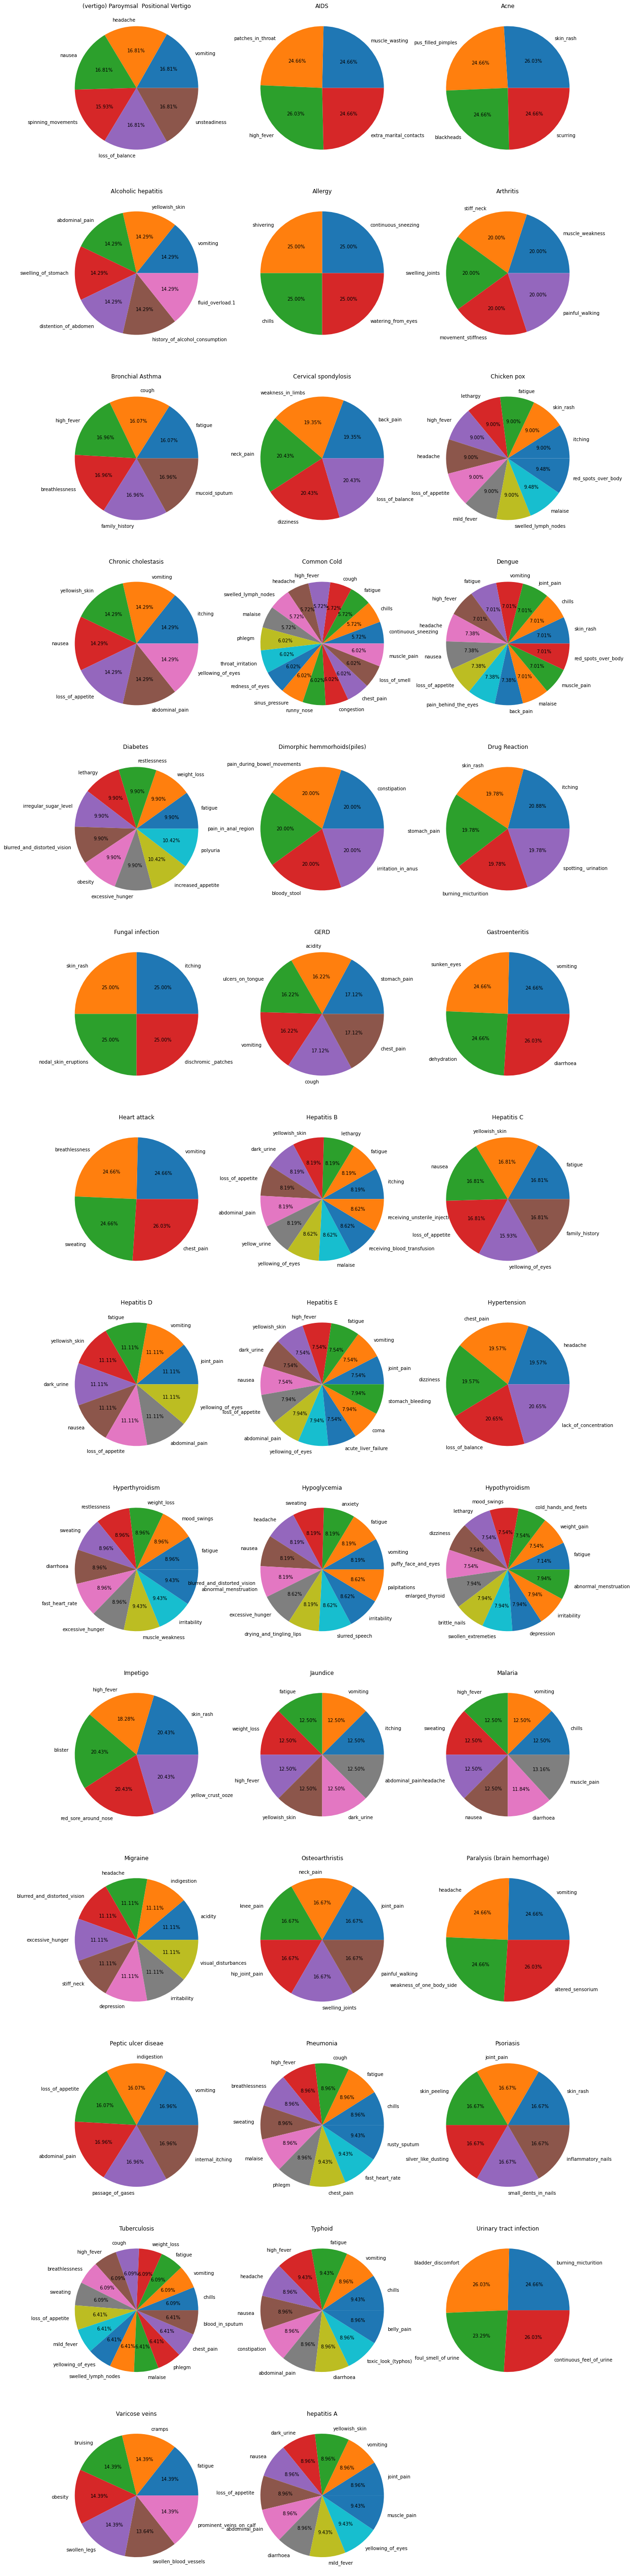

In [123]:
fig = plt.figure(figsize=(20,100))

for i, (name, row) in enumerate(visual_df.iterrows()):
    ax = plt.subplot(14,3, i+1)
    ax.set_title(row.name)
    ax.set_aspect('equal')
    for idx,val in row.items():
        if val==0:
            del row[idx] 
    ax.pie(row, labels=row.index, autopct='%.2f%%')

plt.show()

In [124]:
symp_sev_df = pd.read_csv('./Symptom-severity.csv')[:-1]
symp_sev_df

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
127,small_dents_in_nails,2
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2


Count: weight    132.0
Name: count, dtype: float64


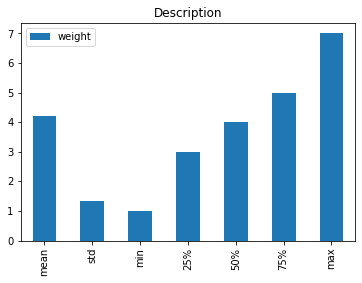

In [125]:
count = symp_sev_df.describe().loc['count']
print("Count:",count)
des = symp_sev_df.describe()[1:]
des.plot(kind='bar',title="Description")
plt.show()

In [91]:
classes = train_df['prognosis'].describe().loc['unique']  # describe() gives the description of dataframe and unique is its index 
                                                            #              which contains the number of unique values
classes

41

Severity Of Symptoms


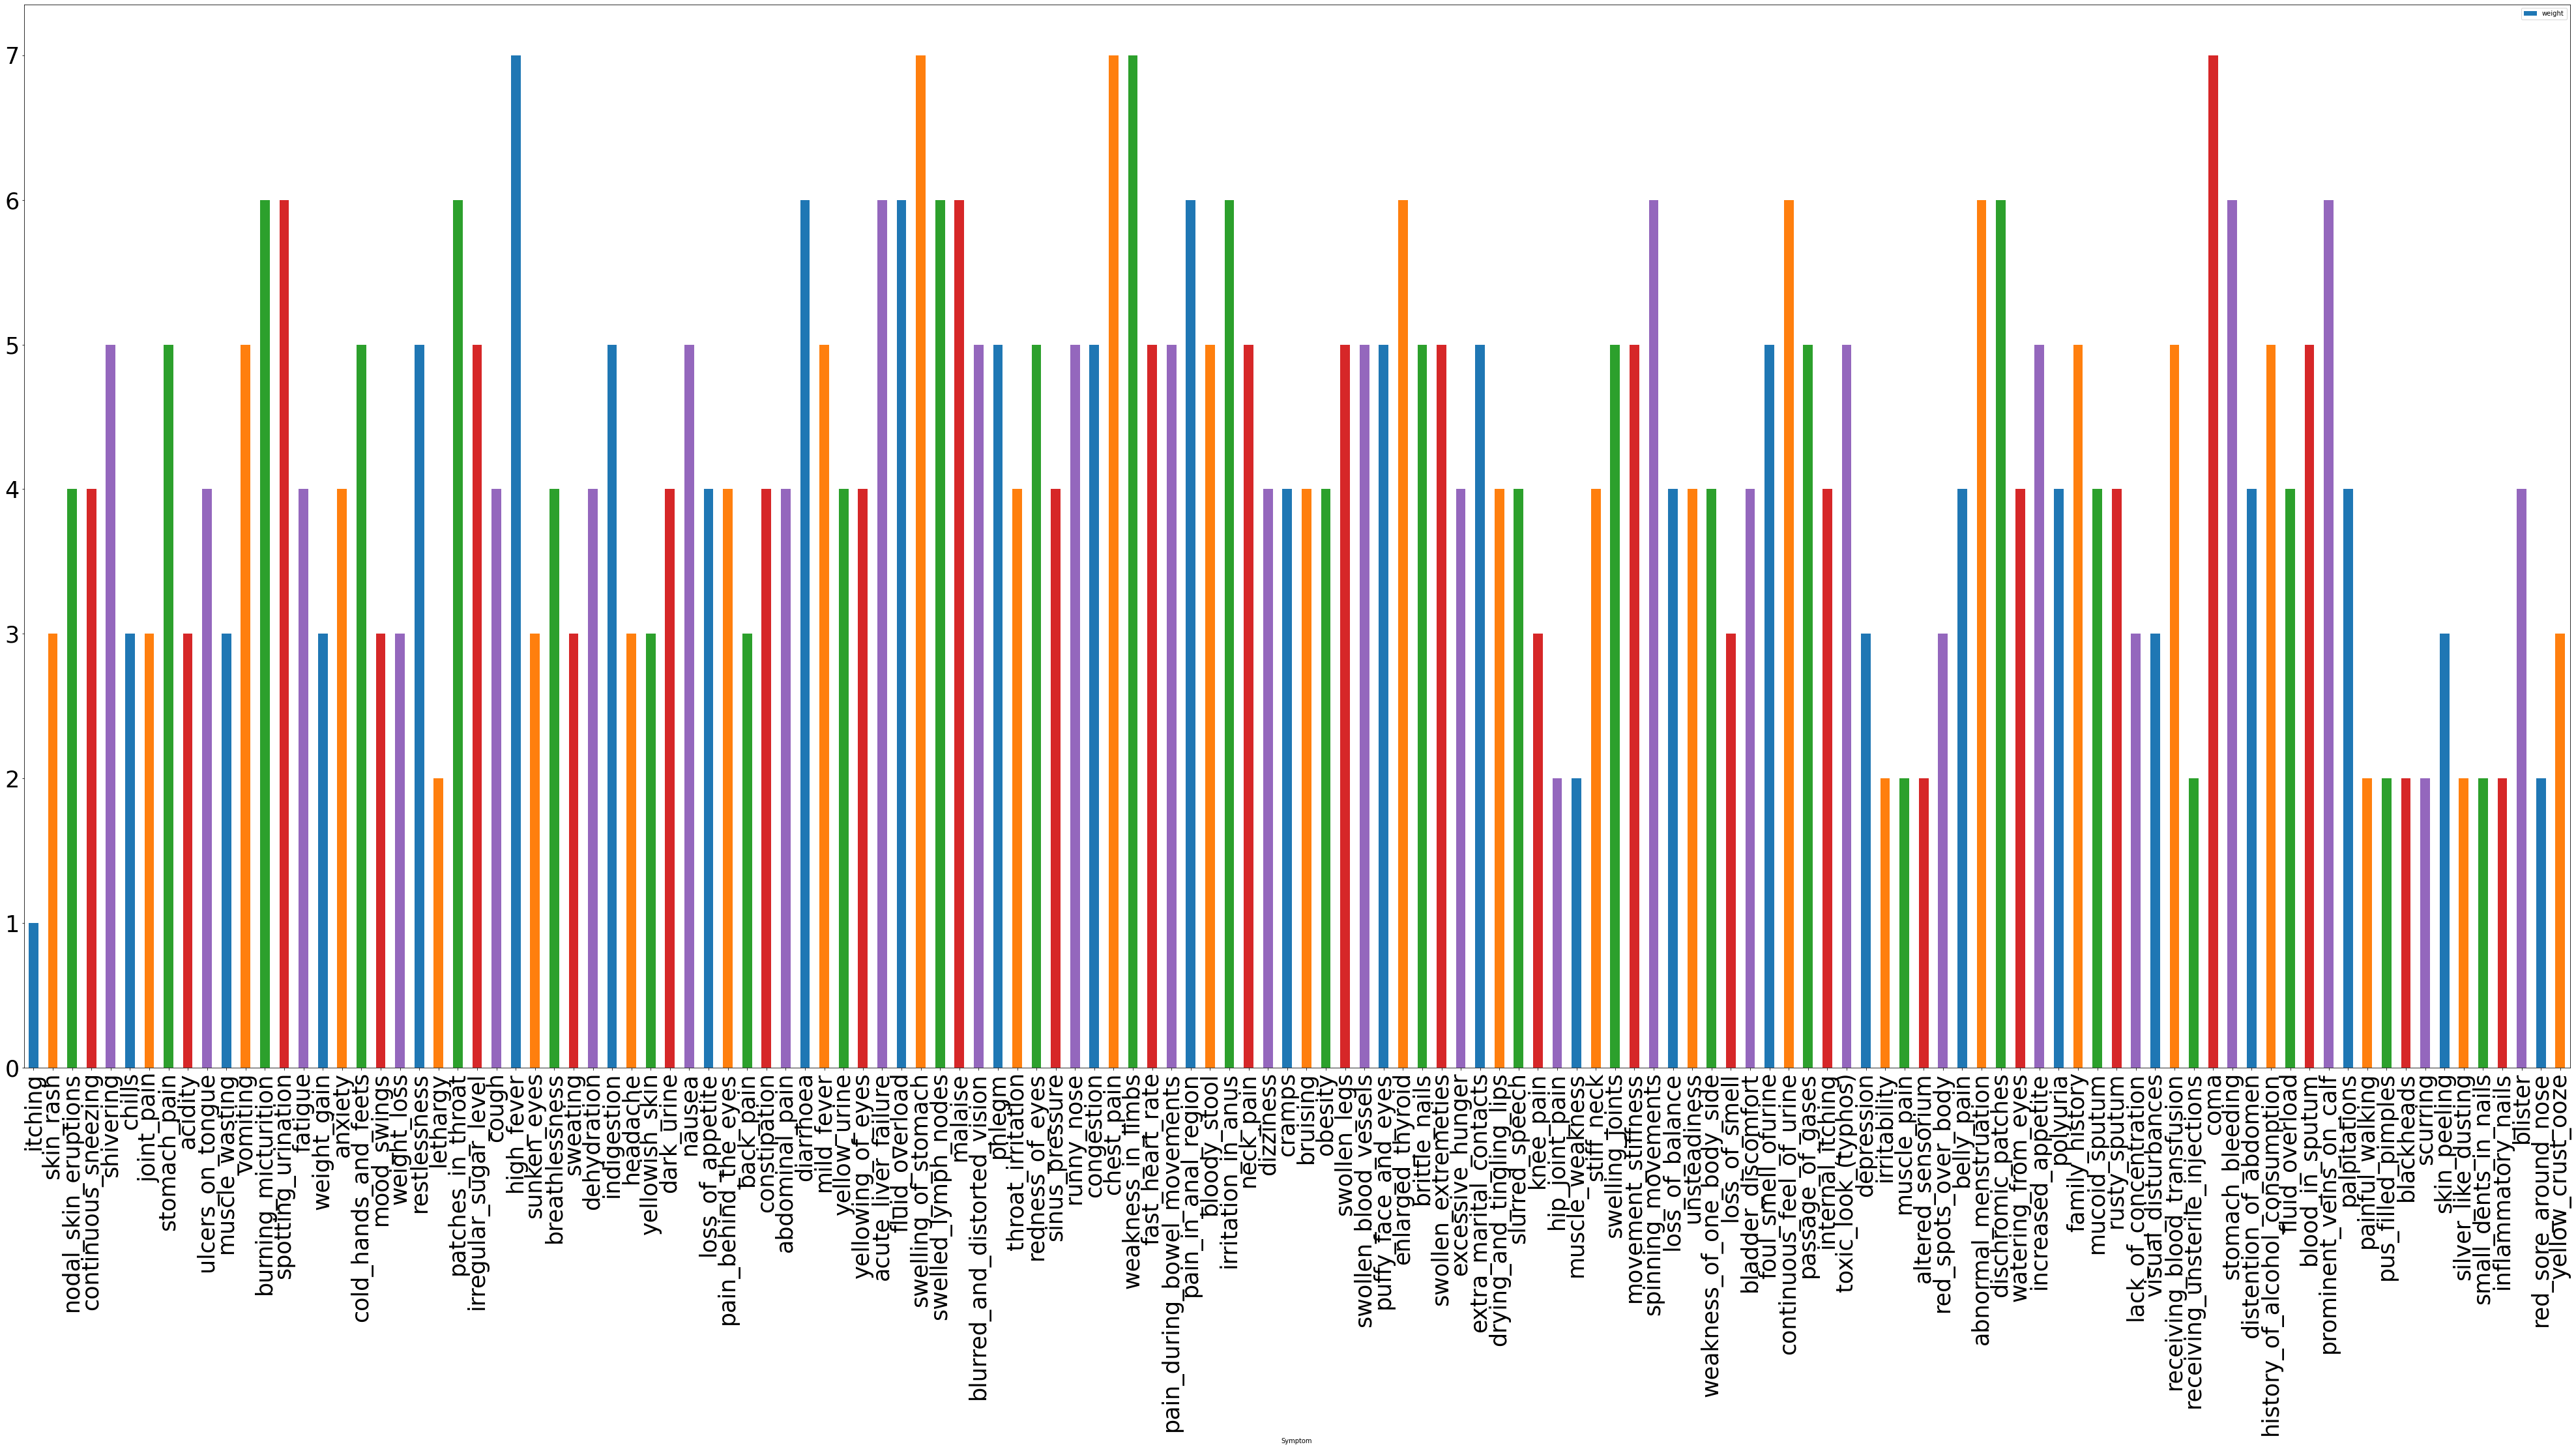

In [126]:
print('Severity Of Symptoms')
symp_sev_df.plot(x='Symptom',y='weight',kind='bar',figsize=(70,30), fontsize=35, color=['C0', 'C1', 'C2', 'C3', 'C4'])
plt.show()

In [127]:
classes = train_df['prognosis'].describe().loc['unique']  # describe() gives the description of dataframe and unique is its index 
                                                            #              which contains the number of unique values
classes

41

In [128]:
training_inputs = train_df.columns[:-1]         # train_df.columns gives all column names in which take all except the last one
training_targets = ['prognosis']                # the last one to predict
in_features = len(training_inputs)              # number of input features means SYMPTOMS
training_inputs, training_targets, in_features  

(Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
        'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
        'ulcers_on_tongue',
        ...
        'pus_filled_pimples', 'blackheads', 'scurring', 'skin_peeling',
        'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
        'blister', 'red_sore_around_nose', 'yellow_crust_ooze'],
       dtype='object', length=132),
 ['prognosis'],
 132)

In [129]:
labels = dict(enumerate(train_df['prognosis'].astype('category').cat.categories))
labels

{0: '(vertigo) Paroymsal  Positional Vertigo',
 1: 'AIDS',
 2: 'Acne',
 3: 'Alcoholic hepatitis',
 4: 'Allergy',
 5: 'Arthritis',
 6: 'Bronchial Asthma',
 7: 'Cervical spondylosis',
 8: 'Chicken pox',
 9: 'Chronic cholestasis',
 10: 'Common Cold',
 11: 'Dengue',
 12: 'Diabetes ',
 13: 'Dimorphic hemmorhoids(piles)',
 14: 'Drug Reaction',
 15: 'Fungal infection',
 16: 'GERD',
 17: 'Gastroenteritis',
 18: 'Heart attack',
 19: 'Hepatitis B',
 20: 'Hepatitis C',
 21: 'Hepatitis D',
 22: 'Hepatitis E',
 23: 'Hypertension ',
 24: 'Hyperthyroidism',
 25: 'Hypoglycemia',
 26: 'Hypothyroidism',
 27: 'Impetigo',
 28: 'Jaundice',
 29: 'Malaria',
 30: 'Migraine',
 31: 'Osteoarthristis',
 32: 'Paralysis (brain hemorrhage)',
 33: 'Peptic ulcer diseae',
 34: 'Pneumonia',
 35: 'Psoriasis',
 36: 'Tuberculosis',
 37: 'Typhoid',
 38: 'Urinary tract infection',
 39: 'Varicose veins',
 40: 'hepatitis A'}

In [130]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)        # deep=True makes a deep copy, including a copy of the data and the indices. 
    
    # Convert non-numeric categorical columns to numbers
    c = dataframe1['prognosis'].astype('category')         # this will give all the categories (Further Info: Pandas Documentation)
    dataframe1['prognosis'] = c.cat.codes                  # this will change categories with codes
    
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[training_inputs].to_numpy()    # convert dataframe object to numpy arrays
    targets_array = dataframe1[training_targets].to_numpy()
    return inputs_array, targets_array

In [131]:
inputs, targets = dataframe_to_arrays(train_df)                   # calling above function
inputs = torch.from_numpy(inputs).type(torch.float32)             # converting numpy arrays to pytorch tensors
targets = torch.from_numpy(targets).type(torch.float32)
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

In [133]:
dataset = TensorDataset(inputs, targets)
size = len(dataset)
size

4920

In [134]:
test_size = int(0.1*size)                                                 # setting the size of test dataset (10%)
val_size = int(0.2*size)                                                  # setting the size of validation dataset (20%)
train_size = int(size - (val_size + test_size))                           # setting the size of train dataset
print(train_size, val_size, test_size)

torch.manual_seed(10)                                           # setting manual seed will generate the same random numbers everytime
                                                                #  so that we can evaluate the model using same validation dataset
train_ds, val_ds, test_ds0 = random_split(dataset,[train_size,val_size,test_size])    #splitting the dataset

3444 984 492


In [135]:
test_ds1 = TensorDataset(t_inputs, t_targets)
len(test_ds1)        # length of test dataset from the test csv file

41

In [136]:
test_ds = ConcatDataset([test_ds0, test_ds1])
len(test_ds)

533

In [137]:
batch_size = 1000
train_dl = DataLoader(train_ds,batch_size, shuffle = True)
val_dl = DataLoader(train_ds,batch_size*2)
test_dl = DataLoader(test_ds,batch_size*2)

In [138]:
def Accuracy(outputs, targets):
    _, preds = torch.max(F.softmax(outputs, dim=1), dim=1)
    acc = torch.tensor(torch.sum(preds == targets).item() / len(preds))
    return acc

In [139]:
def train(model,train_data_loader, optimizer):
    losses = []
    for inputs, targets in train_data_loader:
        targets = torch.flatten(targets).long()
        outputs = model(inputs)
        loss = F.cross_entropy(outputs, targets)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        losses.append(loss.detach())
    return torch.stack(losses).mean().item()

def validate(model, val_data_loader):
    losses = []
    accuracies = []
    for inputs, targets in val_data_loader:
        targets = torch.flatten(targets).long()
        outputs = model(inputs)
        loss = F.cross_entropy(outputs, targets)
        acc = Accuracy(outputs, targets)
        losses.append(loss.detach())
        accuracies.append(acc)
    val_loss = torch.stack(losses).mean()
    val_acc = torch.stack(accuracies).mean()
    return val_loss.item(), val_acc.item()

In [140]:
def fit(model, epochs, lr, train_data_loader, val_data_loader, opt_func=torch.optim.SGD):
    history = []
    for epoch in range(epochs):
        optimizer = opt_func(model.parameters(), lr)
        training_loss = train(model,train_data_loader, optimizer)
        validation_loss, validation_acc = validate(model,val_data_loader)
        result = {'training_loss':training_loss,'validation_loss':validation_loss, 'validation_acc':validation_acc}
        history.append(result)
        if (epoch+1)%20 == 0 or epoch == 0:
            print(f"Epoch = {epoch+1}, Train Loss = {training_loss}, Validation Loss = {validation_loss}, Validation Accuracy = {validation_acc}")
    return history

In [142]:
class Model(nn.Module):
    def __init__(self,in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        # self.clf = nn.Linear(self.in_features,self.out_features)          # we can avoid nn.Sequential aswell
        self.clf = nn.Sequential(nn.Linear(self.in_features,self.out_features))     # nn.Sequential allows us to add more layers to the network
                                                                                    # it is not needed here because a single layer works pretty well
        
    def forward(self, inputs):                                            # to make the model callable
        outputs = self.clf(inputs)
        return outputs
    
    
    def predict_single(self, input, labels):
        outputs = self(input)
        probs = torch.sigmoid(outputs)                          ## prediction with sigmoid to get the all the probabilities greater than 0.8
        probs = [(idx,labels[idx],probs[idx].detach().item()) for idx in range(len(probs)) if probs[idx]>=0.8 or torch.max(probs) == probs[idx]]
        return probs

In [143]:
model = Model(in_features,classes)
model

Model(
  (clf): Sequential(
    (0): Linear(in_features=132, out_features=41, bias=True)
  )
)

In [144]:
result = validate(model, train_dl)
result

(3.733898878097534, 0.06432882696390152)

In [145]:
history = fit(model, 100, 1e-1, train_dl, val_dl)

Epoch = 1, Train Loss = 3.7117905616760254, Validation Loss = 3.6729559898376465, Validation Accuracy = 0.08791621029376984
Epoch = 20, Train Loss = 2.6756625175476074, Validation Loss = 2.649034261703491, Validation Accuracy = 0.9727070331573486
Epoch = 40, Train Loss = 1.8819904327392578, Validation Loss = 1.8577896356582642, Validation Accuracy = 0.9962686896324158
Epoch = 60, Train Loss = 1.330522060394287, Validation Loss = 1.321085810661316, Validation Accuracy = 1.0
Epoch = 80, Train Loss = 0.9657016396522522, Validation Loss = 0.9619057178497314, Validation Accuracy = 1.0
Epoch = 100, Train Loss = 0.7277234792709351, Validation Loss = 0.7216840982437134, Validation Accuracy = 1.0


In [146]:
test_loss, test_acc = validate(model,test_dl)
test_loss, test_acc

(0.7258884906768799, 1.0)

In [147]:
input , output = test_ds[50]
print("actual:",int(output.item()), labels[output.item()])
model.predict_single(input, labels)

actual: 27 Impetigo


[(27, 'Impetigo', 0.9720029234886169)]

In [148]:
torch.save(model,'model.pth')

In [149]:
torch.save(model.state_dict(), 'model_st_dict.pth')

In [150]:
val_losses = [his['validation_loss'] for his in history]
train_losses = [his['training_loss'] for his in history]
val_acc = [his['validation_acc'] for his in history]

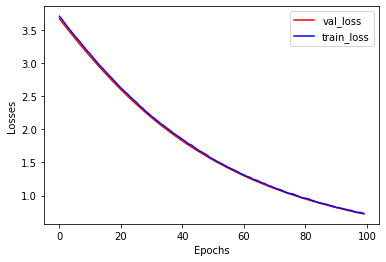

In [151]:
plt.figure(figsize=(6,4))
plt.plot(val_losses, '-r', label="val_loss")
plt.plot(train_losses , '-b', label = "train_loss")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()

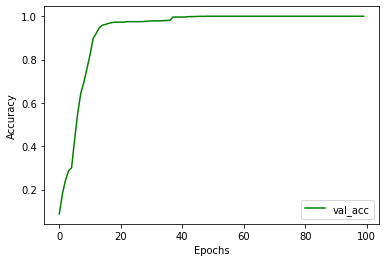

In [152]:
plt.figure(figsize=(6,4))
plt.plot(val_acc, '-g', label="val_acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [153]:
df = train_df.groupby('prognosis').max()
symptoms = {}
for key in dict(df.T).keys():
    symptoms[key]=" ".join([symptom for symptom, value in (df.T)[key].items() if value == 1])
print(symptoms)

{'(vertigo) Paroymsal  Positional Vertigo': 'vomiting headache nausea spinning_movements loss_of_balance unsteadiness', 'AIDS': 'muscle_wasting patches_in_throat high_fever extra_marital_contacts', 'Acne': 'skin_rash pus_filled_pimples blackheads scurring', 'Alcoholic hepatitis': 'vomiting yellowish_skin abdominal_pain swelling_of_stomach distention_of_abdomen history_of_alcohol_consumption fluid_overload.1', 'Allergy': 'continuous_sneezing shivering chills watering_from_eyes', 'Arthritis': 'muscle_weakness stiff_neck swelling_joints movement_stiffness painful_walking', 'Bronchial Asthma': 'fatigue cough high_fever breathlessness family_history mucoid_sputum', 'Cervical spondylosis': 'back_pain weakness_in_limbs neck_pain dizziness loss_of_balance', 'Chicken pox': 'itching skin_rash fatigue lethargy high_fever headache loss_of_appetite mild_fever swelled_lymph_nodes malaise red_spots_over_body', 'Chronic cholestasis': 'itching vomiting yellowish_skin nausea loss_of_appetite abdominal_p

In [154]:
df1 = pd.DataFrame(symptoms, index=["Symptoms"])
syms_df = df1.T

In [155]:
syms_df.to_csv("symptoms.csv")

In [156]:
syms_df.loc['AIDS']

Symptoms    muscle_wasting patches_in_throat high_fever ex...
Name: AIDS, dtype: object

In [157]:
sub_df = df.loc['Drug Reaction']
all = dict(sub_df)
syms = [sym for sym,value in all.items() if value==1]
print(syms)

['itching', 'skin_rash', 'stomach_pain', 'burning_micturition', 'spotting_ urination']


In [158]:
i = torch.zeros(132)
i[3] = 1
training_inputs[1],training_inputs[0], training_inputs[3]

('skin_rash', 'itching', 'continuous_sneezing')

In [159]:
input , output = (i,1)
print("actual:",output)
model.predict_single(input, labels)

actual: 1


[(4, 'Allergy', 0.7279161214828491)]

In [160]:
m = torch.load('./model.pth')

In [161]:
m.predict_single(i,labels)

[(4, 'Allergy', 0.7279161214828491)]

In [164]:
input

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.])